In [1]:
import dask.dataframe as dd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

/Users/saitejasriyerramsetti/.pyenv/versions/3.11.7/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

# set neat seaborn whitegrid styles for matplotlib charts

sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('/Users/saitejasriyerramsetti/Documents/BDA 696/chicago crime/data/Crimes_-_2001_to_Present_20240918.csv')

In [4]:
df.shape

(8156508, 22)

In [5]:
import requests
import pandas as pd
from datetime import datetime

# Base URL for Chicago Crimes API
base_url = "https://data.cityofchicago.org/resource/ijzp-q8t2.json"

# The last date from which we want to fetch new data (previously saved)
# For example, if the last data fetch included crimes up to 2024-09-30
last_fetched_date = "2024-09-30T00:00:00.000"  # Replace this with the actual last date you fetched

# API parameters to fetch data after the last fetched date
params = {
    "$limit": 1000,  # Maximum rows per request
    "$where": f"date > '{last_fetched_date}'"  # Fetch crimes after the last fetched date
}

# Fetch the new data
response = requests.get(base_url, params=params)
new_data = response.json()

# Convert the new data to a Pandas DataFrame
df_new = pd.DataFrame(new_data)

# Append the new data to the existing dataset (assume you have an existing DataFrame df_existing)
df_combined = pd.concat([df, df_new], ignore_index=True)

# Save the updated dataset (optional)
df_combined.to_csv("chicago_crimes_updated.csv", index=False)

print(f"Total rows after update: {len(df_combined)}")


Total rows after update: 8157508


In [6]:
print('Chicago Crime data stats:')
print('---------------------------------------')
print('{:,} total records'.format(len(df)))  # No partitions for pandas DataFrame
print('DataFrame size: {:,}'.format(df.size))


Chicago Crime data stats:
---------------------------------------
8,156,508 total records
DataFrame size: 179,443,176


In [7]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [8]:
df.shape

(8156508, 22)

In [9]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.156508e+06,8.156508e+06,8.156461e+06,7.541679e+06,7.543055e+06,8.066667e+06,8.066667e+06,8.156508e+06,8.066667e+06,8.066667e+06
mean,7.311930e+06,1.184680e+03,1.129756e+01,2.277397e+01,3.742005e+01,1.164628e+06,1.885864e+06,2.010559e+03,4.184241e+01,-8.767139e+01
std,3.665571e+06,7.035513e+02,6.959836e+00,1.385599e+01,2.154698e+01,1.697433e+04,3.246270e+04,6.734973e+00,8.931732e-02,6.150334e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.939192e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153028e+06,1.859136e+06,2.005000e+03,4.176885e+01,-8.771350e+01
50%,7.307124e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166168e+06,1.890878e+06,2.010000e+03,4.185622e+01,-8.766571e+01
75%,1.059528e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176390e+06,1.909379e+06,2.016000e+03,4.190702e+01,-8.762811e+01
max,1.360058e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.024000e+03,4.202291e+01,-8.752453e+01


In [10]:
df.isnull().sum()


ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13553
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89841
Y Coordinate             89841
Year                         0
Updated On                   0
Latitude                 89841
Longitude                89841
Location                 89841
dtype: int64

In [11]:
import pandas as pd

# Load your data (assuming df is your DataFrame)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract different components of the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# Quick overview of data types and null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156508 entries, 0 to 8156507
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

# Handling missing values

### Misssing values in district
- KNN tends to be more robust to outliers and irregularities in the distribution of the target variable. In a scenario where the District boundaries are not well defined by a linear trend, KNN would likely provide better estimates.
- Linear Regression could lead to predictions that are not valid district numbers (e.g., fractions, or numbers outside the possible district range), while KNN will simply assign the most probable value based on neighbors.
- If you want a quick and simple solution and are okay with potentially less precise imputation, you could try interpolation.
However, for better accuracy and interpretability of geographical boundaries, I recommend using KNN. It can better understand the relationship between latitude/longitude and the discrete nature of district identifiers.
- KNN will treat the geographical boundaries more appropriately than interpolation, especially for non-linear spatial relationships, which is why I would still lean towards KNN over interpolation in this specific context.

In [12]:
df.loc[
    df['District'].isnull() & 
    df['Latitude'].notnull() & 
    df['Longitude'].notnull(), 
    ['Latitude', 'Longitude']
]

,Latitude,Longitude
431403,41.892240,-87.603173
1254407,41.884107,-87.610757
2095263,41.899573,-87.723769
2109117,41.879494,-87.740576
2109371,41.908024,-87.667617
2109431,41.787479,-87.618638
2110647,41.917152,-87.636346
2113484,41.903900,-87.769697
2116056,41.908731,-87.722840
2119341,41.757672,-87.648165


Based on Chicago's geographical boundaries:
- Latitude range: Approximately 41.6447° N to 42.0230° N
- Longitude range: Approximately -87.9400° W to -87.5245° W

## Applying KNN for missing values in district 

Given that your dataset has over 8 million rows and KNN is taking a significant amount of time to process, this is not surprising since KNN's computational complexity increases with the number of data points. 

- I would like to give a try for KNN clustering method

## handling missing values in latitude and longitude before working on district data

In [13]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13553
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89841
Y Coordinate             89841
Year                         0
Updated On                   0
Latitude                 89841
Longitude                89841
Location                 89841
Month                        0
DayOfWeek                    0
Hour                         0
dtype: int64

In [14]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13553
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89841
Y Coordinate             89841
Year                         0
Updated On                   0
Latitude                 89841
Longitude                89841
Location                 89841
Month                        0
DayOfWeek                    0
Hour                         0
dtype: int64

In [15]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,DayOfWeek,Hour
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN,3,Wednesday,12
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,12,Thursday,15
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,5,Sunday,0
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,12,Thursday,16
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN,6,Sunday,0


In [16]:
df['Location Description'].nunique()

218

#### KD-Tree for Nearest Neighbor Search (SciPy)  
The KD-Tree implementation from the SciPy library is an efficient way to find the nearest neighbors in spatial data. This is computationally faster than looping over every point, especially for large datasets.

- Concept: Build a KD-Tree using rows with known Location Description values and then query the missing rows to find the closest match.
- Advantages: KD-Tree is highly optimized for fast nearest neighbor searches and works well with large datasets.

I would like to use latitude and longitude to find the location descritption

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree

# Step 1: Extract valid data with non-null Latitude and Longitude
valid_data = df[df['Latitude'].notna() & df['Longitude'].notna()]
missing_data = df[df['Latitude'].isna() | df['Longitude'].isna()]

# Step 2: Create KDTree using valid latitude and longitude
tree = KDTree(valid_data[['Latitude', 'Longitude']], leaf_size=30)

# Step 3: Replace missing Latitude and Longitude with median values temporarily
median_lat = valid_data['Latitude'].median()
median_lon = valid_data['Longitude'].median()

# Assign temporary median values for missing rows for KDTree query
missing_data['Latitude'].fillna(median_lat, inplace=True)
missing_data['Longitude'].fillna(median_lon, inplace=True)

# Step 4: Use KDTree to find the nearest neighbor for all missing rows at once
dist, idx = tree.query(missing_data[['Latitude', 'Longitude']], k=1)

# Step 5: Impute missing values using the nearest neighbor found
nearest_indices = idx.flatten()
nearest_neighbors = valid_data.iloc[nearest_indices]

# Update the missing rows with the nearest neighbors' values
missing_data.loc[:, 'Latitude'] = nearest_neighbors['Latitude'].values
missing_data.loc[:, 'Longitude'] = nearest_neighbors['Longitude'].values

# Step 6: Combine the data back together
df.update(missing_data)

# Step 7: Verify that all missing values have been handled
print(df[['Latitude', 'Longitude']].isna().sum())



/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_49912/3776533933.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_data['Latitude'].fillna(median_lat, inplace=True)
/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_49912/3776533933.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Latitude'].fill

Latitude     0
Longitude    0
dtype: int64


In [18]:
df['Latitude'].isnull().sum()   

0

In [19]:
from sklearn.cluster import KMeans

# Define the number of clusters equal to the number of districts (assuming there are 25 districts)
n_clusters = df['District'].nunique()

# Extract valid data with non-null District values
valid_data = df[df['District'].notna()]

# Fit KMeans on available latitude and longitude
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
valid_data['Cluster'] = kmeans.fit_predict(valid_data[['Latitude', 'Longitude']])

# Assign cluster labels to the entire dataset
df['Cluster'] = kmeans.predict(df[['Latitude', 'Longitude']])

# Map cluster to district based on the most common district in each cluster
cluster_to_district = valid_data.groupby('Cluster')['District'].agg(lambda x: x.mode()[0]).to_dict()

# Impute missing districts based on cluster assignment
df.loc[df['District'].isna(), 'District'] = df['Cluster'].map(cluster_to_district)


/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_49912/1367850818.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Cluster'] = kmeans.fit_predict(valid_data[['Latitude', 'Longitude']])


In [20]:
df.isnull().sum()  


ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13553
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89841
Y Coordinate             89841
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                 89841
Month                        0
DayOfWeek                    0
Hour                         0
Cluster                      0
dtype: int64

In [21]:
from scipy.spatial import KDTree
import numpy as np

# Split the data into known and unknown Location Descriptions
known_data = df[df['Location Description'].notna()]
unknown_data = df[df['Location Description'].isna()]

# Build KD-Tree using Latitude and Longitude of rows with known Location Descriptions
tree = KDTree(known_data[['Latitude', 'Longitude']].values)

# Query the nearest neighbors for rows with missing Location Description
distances, indices = tree.query(unknown_data[['Latitude', 'Longitude']].values, k=1)

# Map the nearest known Location Description back to the rows with missing values
nearest_descriptions = known_data.iloc[indices]['Location Description'].values
df.loc[unknown_data.index, 'Location Description'] = nearest_descriptions


In [22]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89841
Y Coordinate             89841
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                 89841
Month                        0
DayOfWeek                    0
Hour                         0
Cluster                      0
dtype: int64

In [23]:
df = df.drop('Location', axis=1)

In [24]:
df['District'].isnull().sum()   

0

In [25]:
import pandas as pd

# Assuming df is your DataFrame

# Count the number of unique Wards in each District
ward_counts = df.groupby('District')['Ward'].nunique().reset_index()
ward_counts.columns = ['District', 'Unique_Wards']
print(ward_counts)

# Find the districts with more than one unique Ward
multiple_wards = ward_counts[ward_counts['Unique_Wards'] > 1]
print("Districts with multiple Wards:")
print(multiple_wards)

# Count the number of unique Community Areas in each District
community_area_counts = df.groupby('District')['Community Area'].nunique().reset_index()
community_area_counts.columns = ['District', 'Unique_Community_Areas']
print(community_area_counts)

# Find the districts with more than one unique Community Area
multiple_community_areas = community_area_counts[community_area_counts['Unique_Community_Areas'] > 1]
print("Districts with multiple Community Areas:")
print(multiple_community_areas)


    District  Unique_Wards
0        1.0            16
1        2.0            17
2        3.0            11
3        4.0            11
4        5.0            14
5        6.0            16
6        7.0            14
7        8.0            20
8        9.0            19
9       10.0            18
10      11.0            14
11      12.0            27
12      14.0            17
13      15.0             8
14      16.0            17
15      17.0            17
16      18.0            17
17      19.0            18
18      20.0            14
19      21.0             1
20      22.0            15
21      24.0             9
22      25.0            20
23      31.0            31
Districts with multiple Wards:
    District  Unique_Wards
0        1.0            16
1        2.0            17
2        3.0            11
3        4.0            11
4        5.0            14
5        6.0            16
6        7.0            14
7        8.0            20
8        9.0            19
9       10.0            

In [26]:
from scipy.spatial import KDTree
import numpy as np

# Separate data into known and unknown Ward and Community Area values
known_data = df[df['Ward'].notna() & df['Community Area'].notna()]
unknown_data = df[df['Ward'].isna() | df['Community Area'].isna()]

# Build KD-Tree using Latitude and Longitude of rows with known values
tree = KDTree(known_data[['Latitude', 'Longitude']].values)

# Query nearest neighbors for missing Ward and Community Area rows
distances, indices = tree.query(unknown_data[['Latitude', 'Longitude']].values, k=1)

# Impute missing Ward values
missing_ward_indices = unknown_data['Ward'].isna()
df.loc[unknown_data.index[missing_ward_indices], 'Ward'] = known_data.iloc[indices[missing_ward_indices]]['Ward'].values

# Impute missing Community Area values
missing_community_indices = unknown_data['Community Area'].isna()
df.loc[unknown_data.index[missing_community_indices], 'Community Area'] = known_data.iloc[indices[missing_community_indices]]['Community Area'].values


In [27]:
df.isnull().sum()   

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            89841
Y Coordinate            89841
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Month                       0
DayOfWeek                   0
Hour                        0
Cluster                     0
dtype: int64

## EDA (trends and patterns)

### Yearly Crime Trends
- Total Crimes per Year: Group the data by year to analyze how the total number of crimes has changed over time.

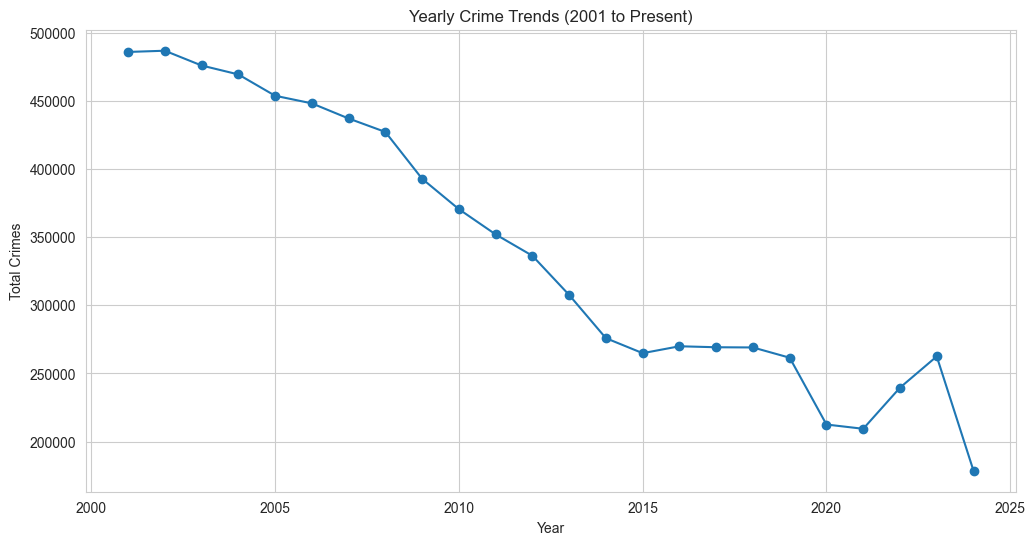

In [28]:
yearly_trends = df.groupby('Year').size().reset_index(name='Total_Crimes')

# Plot yearly trends
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Total_Crimes'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Yearly Crime Trends (2001 to Present)')
plt.grid(True)
plt.show()


##  Monthly and Weekly Patterns

### Monthly Crime Trends: Group by year and month to identify any seasonality.

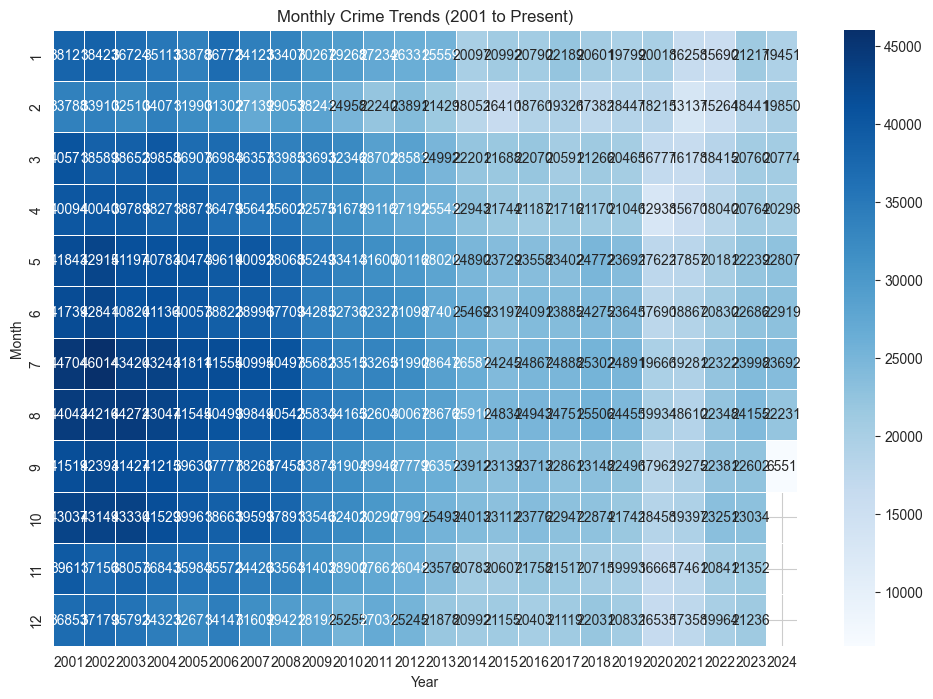

In [29]:
monthly_trends = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Crimes')

# Pivot table for easier visualization
monthly_pivot = monthly_trends.pivot(index='Month', columns='Year', values='Total_Crimes')

# Heatmap of monthly crime trends
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_pivot, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title('Monthly Crime Trends (2001 to Present)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


### Day of the Week Analysis: Check if certain days have more crime activity.



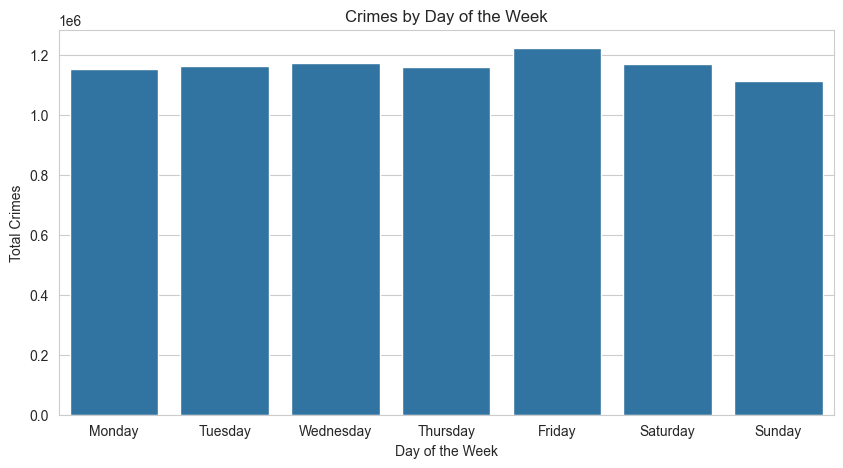

In [30]:
day_of_week_trends = df.groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='Total_Crimes')

# Plot day of the week trends
plt.figure(figsize=(10, 5))
sns.barplot(x='DayOfWeek', y='Total_Crimes', data=day_of_week_trends)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crimes')
plt.show()


## Hourly Crime Trends
### Hourly Crime Analysis: Find out when crimes occur the most by analyzing the hour of the day.

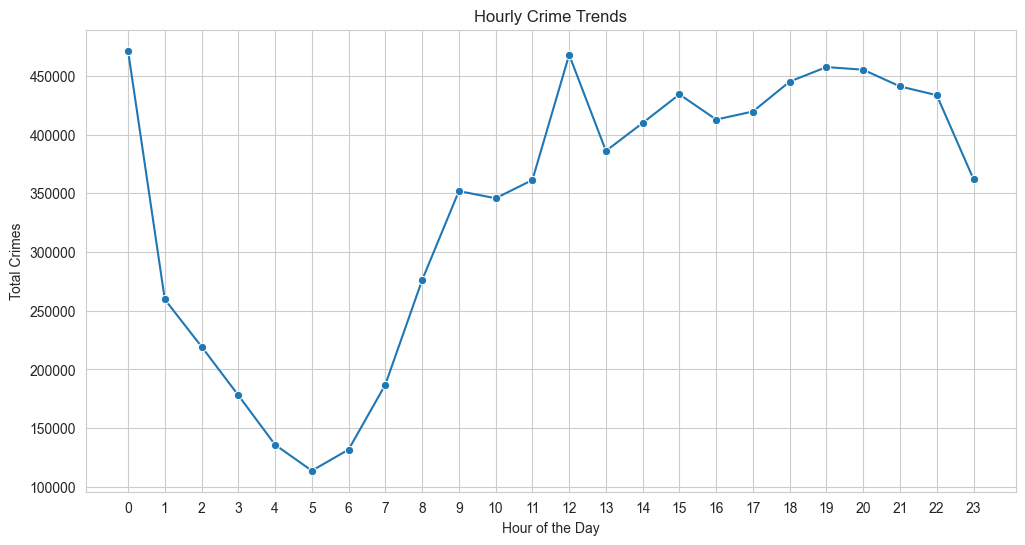

In [31]:
hourly_trends = df.groupby('Hour').size().reset_index(name='Total_Crimes')

# Plot hourly crime trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Total_Crimes', data=hourly_trends, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crimes')
plt.title('Hourly Crime Trends')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# Time Series Analysis

For deeper insights, you can perform time series analysis using models like ARIMA or Facebook Prophet to forecast crime trends or understand seasonality.

### Resample Data for Time Series
- Resample the data to monthly or daily frequency to analyze overall crime trends.

/var/folders/mv/fn0_k_w53c51rdr43rfnd7gr0000gn/T/ipykernel_49912/2035093531.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = df.resample('M', on='Date').size()


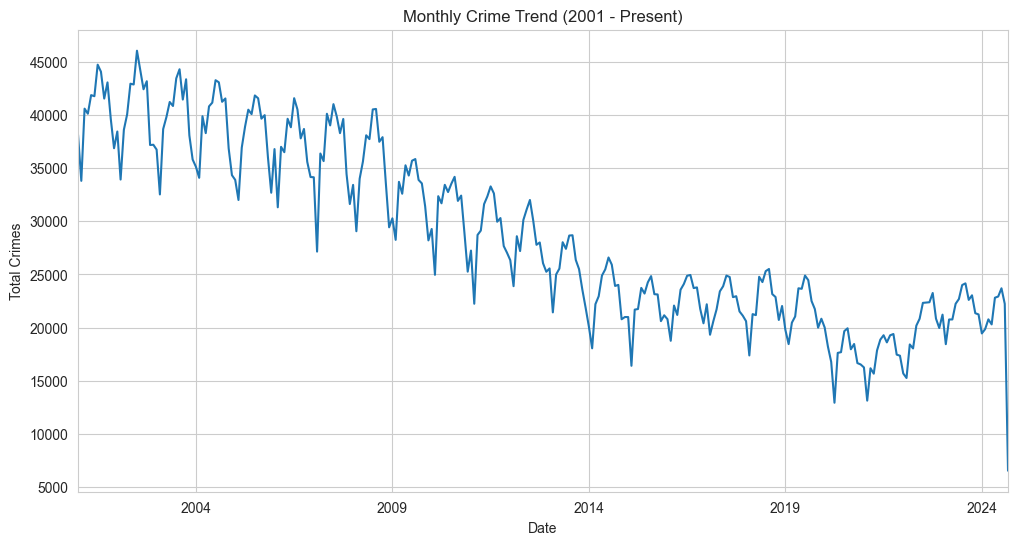

In [32]:
# Resample data to monthly frequency
monthly_resampled = df.resample('M', on='Date').size()

# Plot the resampled data
plt.figure(figsize=(12, 6))
monthly_resampled.plot()
plt.title('Monthly Crime Trend (2001 - Present)')
plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


### Forecasting Using Facebook Prophet


/Users/saitejasriyerramsetti/.pyenv/versions/3.11.7/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
23:18:15 - cmdstanpy - INFO - Chain [1] start processing
23:18:16 - cmdstanpy - INFO - Chain [1] done processing
/Users/saitejasriyerramsetti/.pyenv/versions/3.11.7/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


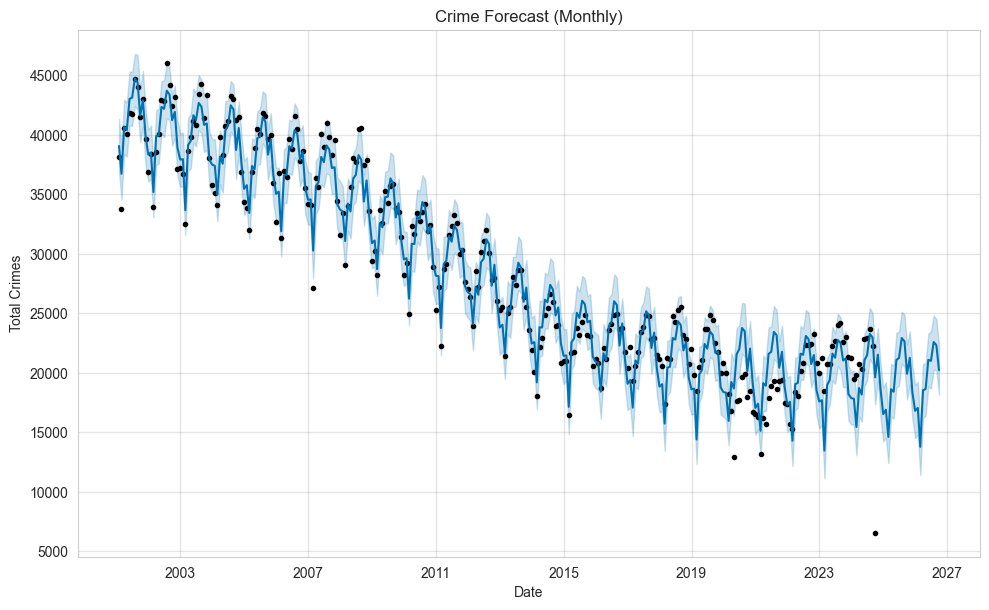

In [33]:
from prophet import Prophet


# Prepare data for Prophet
df_prophet = monthly_resampled.reset_index()
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=24, freq='M')  # Forecast for the next 2 years
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Crime Forecast (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.show()


## Crime Type Analysis Over Time

- Analyze the distribution of different crime types (Primary Type) over time.

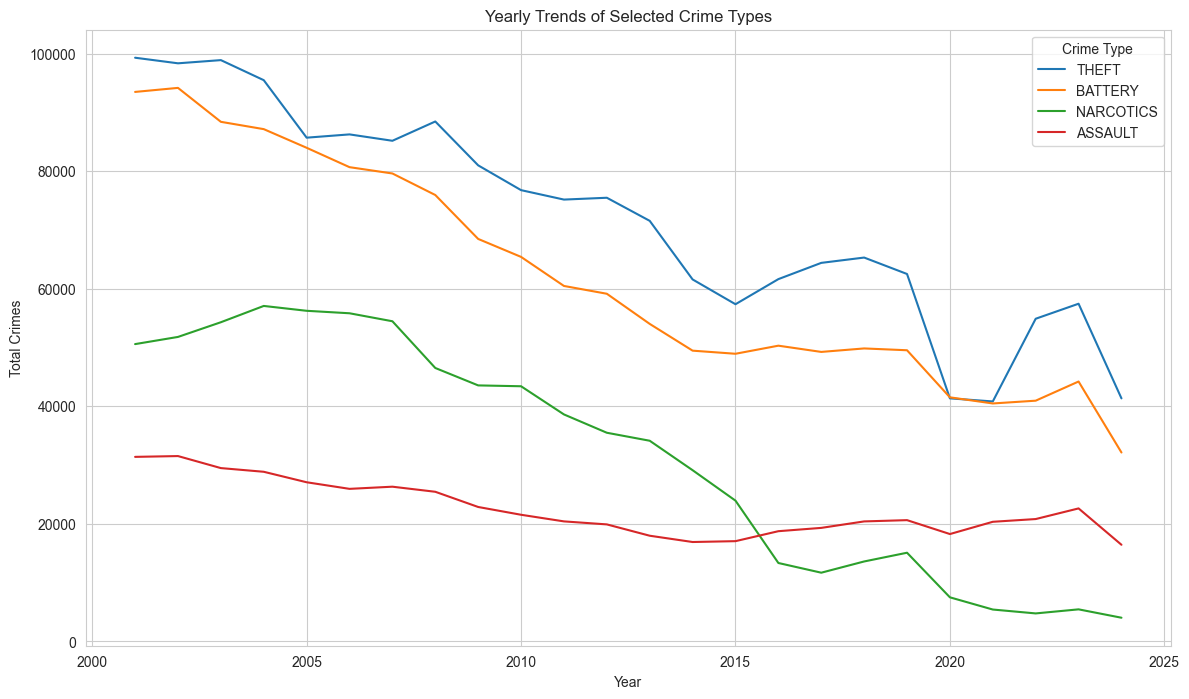

In [34]:
# Group by Year and Crime Type
crime_type_yearly = df.groupby(['Year', 'Primary Type']).size().reset_index(name='Total_Crimes')

# Pivot table for visualization
crime_type_pivot = crime_type_yearly.pivot(index='Year', columns='Primary Type', values='Total_Crimes')

# Plot trends for some specific crime types
crime_types_of_interest = ['THEFT', 'BATTERY', 'NARCOTICS', 'ASSAULT']
crime_type_pivot[crime_types_of_interest].plot(figsize=(14, 8))
plt.title('Yearly Trends of Selected Crime Types')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.legend(title='Crime Type')
plt.show()


## Geographic Analysis 

In [35]:
import folium
from folium.plugins import HeatMap

# Create a heatmap using Latitude and Longitude
crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows() if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]
HeatMap(heat_data).add_to(crime_map)

# Display the map
crime_map.save("chicago_crime_heatmap.html")


### Removing unecessary columns

#### Columns to Drop: Let's identify columns that either have no predictive power, are duplicates of existing information, or are unlikely to contribute meaningfully to the models.

- **ID**: This is likely a unique identifier and does not provide any predictive power. Drop it.
- **Case** Number: Similar to ID, this is also just an identifier, and not useful for predicting crime types or times. Drop it.
- **Block**: This column may contain specific address information, but it would be difficult to standardize, and the latitude/longitude data already provides spatial information. Drop it.
- **Description**: This is a detailed description of the Primary Type of crime, which is likely redundant. The Primary Type already gives enough information about the crime, so we can drop it.
- **FBI Code**: This field represents a classification code that is often redundant with Primary Type. It is likely not adding new predictive value. Drop it.
- **Updated On**: This is a technical date representing when the record was last updated. It has no bearing on crime patterns or predictions. Drop it.

In [36]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Month',
       'DayOfWeek', 'Hour', 'Cluster'],
      dtype='object')

# Feature Engineering

1. Date

In [37]:
import pandas as pd

# Load your data (assuming df is your DataFrame)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract different components of the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

# Quick overview of data types and null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156508 entries, 0 to 8156507
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [38]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Month',
       'DayOfWeek', 'Hour', 'Cluster'],
      dtype='object')

In [39]:
df['Location Description'].unique()

array(['BANK', 'APARTMENT', 'RESIDENCE', 'OTHER', 'STREET',
       'RESIDENCE - PORCH / HALLWAY', 'RESTAURANT', 'HOTEL/MOTEL',
       'BAR OR TAVERN', 'SIDEWALK', 'ATHLETIC CLUB',
       'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE',
       'POLICE FACILITY/VEH PARKING LOT', 'TAVERN/LIQUOR STORE',
       'VEHICLE NON-COMMERCIAL', 'OTHER (SPECIFY)',
       'HOSPITAL BUILDING / GROUNDS', 'CHA APARTMENT',
       'DRIVEWAY - RESIDENTIAL', 'PARKING LOT / GARAGE (NON RESIDENTIAL)',
       'COMMERCIAL / BUSINESS OFFICE', 'DEPARTMENT STORE', 'LIBRARY',
       'GROCERY FOOD STORE', 'NURSING HOME/RETIREMENT HOME',
       'RESIDENCE-GARAGE', 'GAS STATION', 'DRUG STORE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'CTA TRAIN', 'WAREHOUSE',
       'CONSTRUCTION SITE', 'MEDICAL / DENTAL OFFICE',
       'ATM (AUTOMATIC TELLER MACHINE)', 'RESIDENTIAL YARD (FRONT/BACK)',
       'CONVENIENCE STORE', 'CHA PARKING LOT / GROUNDS', 'HOTEL / MOTEL',
       'HOSPITAL BUILDING/GROUNDS', 'MEDICAL/DENTAL OFFICE',

2. Location Description
- As there are 218 unique location description I would like to group them by categorizing with broader categories

In [40]:
location_mapping = {
    'BANK': 'Commercial',
    'APARTMENT': 'Residential',
    'RESIDENCE': 'Residential',
    'HOUSE': 'Residential',
    'STREET': 'Public Space',
    'RESIDENCE - PORCH / HALLWAY': 'Residential',
    'RESIDENCE PORCH/HALLWAY': 'Residential',
    'RESTAURANT': 'Commercial',
    'HOTEL/MOTEL': 'Commercial',
    'HOTEL': 'Commercial',
    'MOTEL': 'Commercial',
    'BAR OR TAVERN': 'Commercial',
    'TAVERN/LIQUOR STORE': 'Commercial',
    'TAVERN': 'Commercial',
    'LIQUOR STORE': 'Commercial',
    'SIDEWALK': 'Public Space',
    'ATHLETIC CLUB': 'Recreation and Entertainment',
    'SMALL RETAIL STORE': 'Commercial',
    'RETAIL STORE': 'Commercial',
    'POLICE FACILITY/VEH PARKING LOT': 'Government/Public Institution',
    'POLICE FACILITY': 'Government/Public Institution',
    'TAXICAB': 'Transportation',
    'VEHICLE NON-COMMERCIAL': 'Transportation',
    'VEHICLE - COMMERCIAL': 'Transportation',
    'VEHICLE - DELIVERY TRUCK': 'Transportation',
    'DELIVERY TRUCK': 'Transportation',
    'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)': 'Transportation',
    'OTHER (SPECIFY)': 'Other Locations',
    'HOSPITAL BUILDING / GROUNDS': 'Health Facility',
    'HOSPITAL': 'Health Facility',
    'NURSING HOME/RETIREMENT HOME': 'Health Facility',
    'MEDICAL / DENTAL OFFICE': 'Health Facility',
    'MEDICAL/DENTAL OFFICE': 'Health Facility',
    'ANIMAL HOSPITAL': 'Health Facility',
    'SCHOOL, PUBLIC, BUILDING': 'Educational/Institutional',
    'SCHOOL, PRIVATE, BUILDING': 'Educational/Institutional',
    'SCHOOL - PUBLIC BUILDING': 'Educational/Institutional',
    'SCHOOL - PRIVATE BUILDING': 'Educational/Institutional',
    'SCHOOL - PUBLIC GROUNDS': 'Educational/Institutional',
    'SCHOOL - PRIVATE GROUNDS': 'Educational/Institutional',
    'DAY CARE CENTER': 'Educational/Institutional',
    'COLLEGE / UNIVERSITY - RESIDENCE HALL': 'Educational/Institutional',
    'COLLEGE / UNIVERSITY - GROUNDS': 'Educational/Institutional',
    'COLLEGE/UNIVERSITY RESIDENCE HALL': 'Educational/Institutional',
    'COLLEGE/UNIVERSITY GROUNDS': 'Educational/Institutional',
    'PUBLIC HIGH SCHOOL': 'Educational/Institutional',
    'PUBLIC GRAMMAR SCHOOL': 'Educational/Institutional',
    'SCHOOL YARD': 'Educational/Institutional',
    'PARKING LOT / GARAGE (NON RESIDENTIAL)': 'Public Space',
    'PARKING LOT/GARAGE(NON.RESID.)': 'Public Space',
    'PARK PROPERTY': 'Public Space',
    'ALLEY': 'Public Space',
    'STREET': 'Public Space',
    'VACANT LOT / LAND': 'Public Space',
    'FOREST PRESERVE': 'Public Space',
    'BEACH': 'Public Space',
    'LAKEFRONT / WATERFRONT / RIVERBANK': 'Public Space',
    'RIVER BANK': 'Public Space',
    'LAKE': 'Public Space',
    'PRAIRIE': 'Public Space',
    'WOODED AREA': 'Public Space',
    'CTA BUS': 'Transportation',
    'CTA TRAIN': 'Transportation',
    'CTA PLATFORM': 'Transportation',
    'CTA STATION': 'Transportation',
    'CTA BUS STOP': 'Transportation',
    'CTA SUBWAY STATION': 'Transportation',
    'AIRCRAFT': 'Transportation',
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'Transportation',
    'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'Transportation',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'Transportation',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'Transportation',
    'AIRPORT/AIRCRAFT': 'Transportation',
    'TRUCK': 'Transportation',
    'TRAILER': 'Transportation',
    'FIRE STATION': 'Government/Public Institution',
    'LIBRARY': 'Government/Public Institution',
    'JAIL / LOCK-UP FACILITY': 'Government/Public Institution',
    'COUNTY JAIL': 'Government/Public Institution',
    'FEDERAL BUILDING': 'Government/Public Institution',
    'GOVERNMENT BUILDING / PROPERTY': 'Government/Public Institution',
    'GOVERNMENT BUILDING': 'Government/Public Institution',
    'ATHLETIC CLUB': 'Recreation and Entertainment',
    'BOWLING ALLEY': 'Recreation and Entertainment',
    'POOL ROOM': 'Recreation and Entertainment',
    'SPORTS ARENA / STADIUM': 'Recreation and Entertainment',
    'CASINO/GAMBLING ESTABLISHMENT': 'Recreation and Entertainment',
    'MOVIE HOUSE / THEATER': 'Recreation and Entertainment',
    'MOVIE HOUSE/THEATER': 'Recreation and Entertainment',
    'ALLEY': 'Public Space',
    'SIDEWALK': 'Public Space',
    'DRIVEWAY': 'Residential',
    'GARAGE': 'Residential',
    'RESIDENTIAL YARD (FRONT/BACK)': 'Residential',
    'RESIDENCE - YARD (FRONT / BACK)': 'Residential',
    'CHA APARTMENT': 'Residential',
    'CHA PARKING LOT / GROUNDS': 'Residential',
    'CHA GROUNDS': 'Residential',
    'CHA HALLWAY / STAIRWELL / ELEVATOR': 'Residential',
    'CHA HALLWAY': 'Residential',
    'CHA STAIRWELL': 'Residential',
    'CHA ELEVATOR': 'Residential',
    'CHA LOBBY': 'Residential',
    'GARAGE/AUTO REPAIR': 'Commercial',
    'AUTO / BOAT / RV DEALERSHIP': 'Commercial',
    'CURRENCY EXCHANGE': 'Commercial',
    'PAWN SHOP': 'Commercial',
    'CONVENIENCE STORE': 'Commercial',
    'SMALL RETAIL STORE': 'Commercial',
    'GROCERY FOOD STORE': 'Commercial',
    'GAS STATION': 'Commercial',
    'RESTAURANT': 'Commercial',
    'BAR OR TAVERN': 'Commercial',
    'LIQUOR STORE': 'Commercial',
    'MOVIE HOUSE / THEATER': 'Recreation and Entertainment',
    'MOVIE HOUSE/THEATER': 'Recreation and Entertainment',
    'TAVERN/LIQUOR STORE': 'Commercial',
    'TAVERN': 'Commercial',
    'CEMETARY': 'Public Space',
    'LAKEFRONT/WATERFRONT/RIVERBANK': 'Public Space',
    'RIVER': 'Public Space',
    'FARM': 'Other Locations',
    'TRUCKING TERMINAL': 'Transportation',
    'JUNK YARD/GARBAGE DUMP': 'Other Locations',
    'FUNERAL PARLOR': 'Other Locations',
    'COIN OPERATED MACHINE': 'Commercial',
    'VESTIBULE': 'Residential',
    'ELEVATOR': 'Residential',
    'STAIRWELL': 'Residential',
    'GANGWAY': 'Residential',
    'BASEMENT': 'Residential',
    'LOADING DOCK': 'Commercial',
    'WAREHOUSE': 'Commercial',
    'CONSTRUCTION SITE': 'Other Locations'
}

# Apply the mapping to create broader categories
df['Location Category'] = df['Location Description'].map(location_mapping).fillna('Other')

# Check the new column distribution
print(df['Location Category'].value_counts())


Location Category
Public Space                     3372484
Residential                      2578326
Other                             962937
Commercial                        670534
Transportation                    276383
Educational/Institutional         185365
Other Locations                    33186
Government/Public Institution      31485
Health Facility                    30366
Recreation and Entertainment       15442
Name: count, dtype: int64


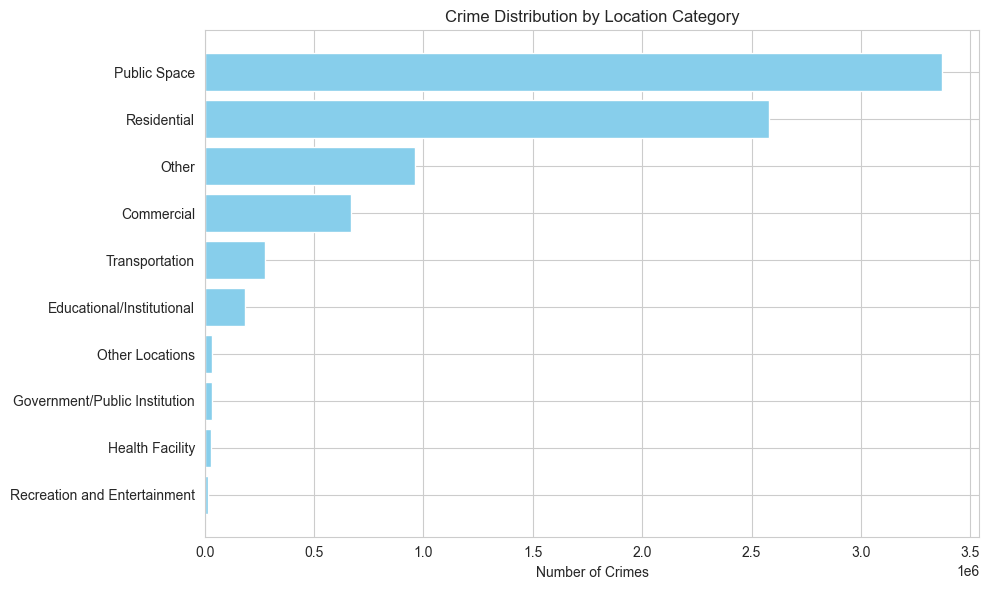

In [41]:
import matplotlib.pyplot as plt

# Data for the plot
categories = [
    'Public Space', 'Residential', 'Other', 'Commercial', 'Transportation', 
    'Educational/Institutional', 'Other Locations', 'Government/Public Institution', 
    'Health Facility', 'Recreation and Entertainment'
]
counts = [
    3372555, 2578296, 962903, 670528, 276378, 
    185363, 33198, 31484, 30356, 15447
]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Number of Crimes')
plt.title('Crime Distribution by Location Category')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a list of all known location descriptions
known_locations = list(location_mapping.keys())

# Fit a TF-IDF Vectorizer
vectorizer = TfidfVectorizer().fit(known_locations)

# Example new location
new_location = "FAST FOOD RESTAURANT"

# Vectorize both known locations and the new location
known_vectors = vectorizer.transform(known_locations)
new_vector = vectorizer.transform([new_location])

# Calculate cosine similarity between the new location and known locations
similarities = cosine_similarity(new_vector, known_vectors)

# Find the index of the most similar known location
most_similar_idx = similarities.argmax()
most_similar_location = known_locations[most_similar_idx]

# Map the new location to the category of the most similar known location
new_location_category = location_mapping.get(most_similar_location, 'Other')

print(f"New Location: {new_location}, Assigned Category: {new_location_category}")


New Location: FAST FOOD RESTAURANT, Assigned Category: Commercial


3. Primary Type

In [43]:
df['Primary Type'].unique() 

array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [44]:
# Define a dictionary for grouping crime types into broader categories
primary_type_grouping = {
    'THEFT': 'Property Crime',
    'BURGLARY': 'Property Crime',
    'MOTOR VEHICLE THEFT': 'Property Crime',
    'CRIMINAL DAMAGE': 'Property Crime',
    'ARSON': 'Property Crime',
    'CRIMINAL TRESPASS': 'Property Crime',
    
    'BATTERY': 'Violent Crime',
    'ASSAULT': 'Violent Crime',
    'HOMICIDE': 'Violent Crime',
    'ROBBERY': 'Violent Crime',
    'STALKING': 'Violent Crime',
    'KIDNAPPING': 'Violent Crime',
    'INTIMIDATION': 'Violent Crime',
    
    'NARCOTICS': 'Drug-Related Crime',
    'OTHER NARCOTIC VIOLATION': 'Drug-Related Crime',
    
    'SEX OFFENSE': 'Sexual Crime',
    'CRIM SEXUAL ASSAULT': 'Sexual Crime',
    'CRIMINAL SEXUAL ASSAULT': 'Sexual Crime',
    'PROSTITUTION': 'Sexual Crime',
    
    'PUBLIC PEACE VIOLATION': 'Public Order Crime',
    'PUBLIC INDECENCY': 'Public Order Crime',
    'LIQUOR LAW VIOLATION': 'Public Order Crime',
    'OBSCENITY': 'Public Order Crime',
    
    'OFFENSE INVOLVING CHILDREN': 'Offenses Involving Children',
    
    'WEAPONS VIOLATION': 'Weapon-Related Crime',
    'CONCEALED CARRY LICENSE VIOLATION': 'Weapon-Related Crime',
    
    'DOMESTIC VIOLENCE': 'Domestic and Family Crime',
    
    'OTHER OFFENSE': 'Other Criminal Offenses',
    'GAMBLING': 'Other Criminal Offenses',
    'RITUALISM': 'Other Criminal Offenses',
    'HUMAN TRAFFICKING': 'Other Criminal Offenses',
    'DECEPTIVE PRACTICE': 'Other Criminal Offenses',
    'NON-CRIMINAL': 'Other Criminal Offenses',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Other Criminal Offenses',
    'NON - CRIMINAL': 'Other Criminal Offenses',
    
    'INTERFERENCE WITH PUBLIC OFFICER': 'Interference with Public Officials'
}

# Apply the mapping to create broader categories
df['Primary Type Grouped'] = df['Primary Type'].map(primary_type_grouping).fillna('Other')

# Check the new column distribution
print(df['Primary Type Grouped'].value_counts())


Primary Type Grouped
Property Crime                        3736158
Violent Crime                         2365859
Other Criminal Offenses                891503
Drug-Related Crime                     755913
Sexual Crime                           139650
Weapon-Related Crime                   119817
Public Order Crime                      69906
Offenses Involving Children             58444
Interference with Public Officials      19257
Domestic and Family Crime                   1
Name: count, dtype: int64


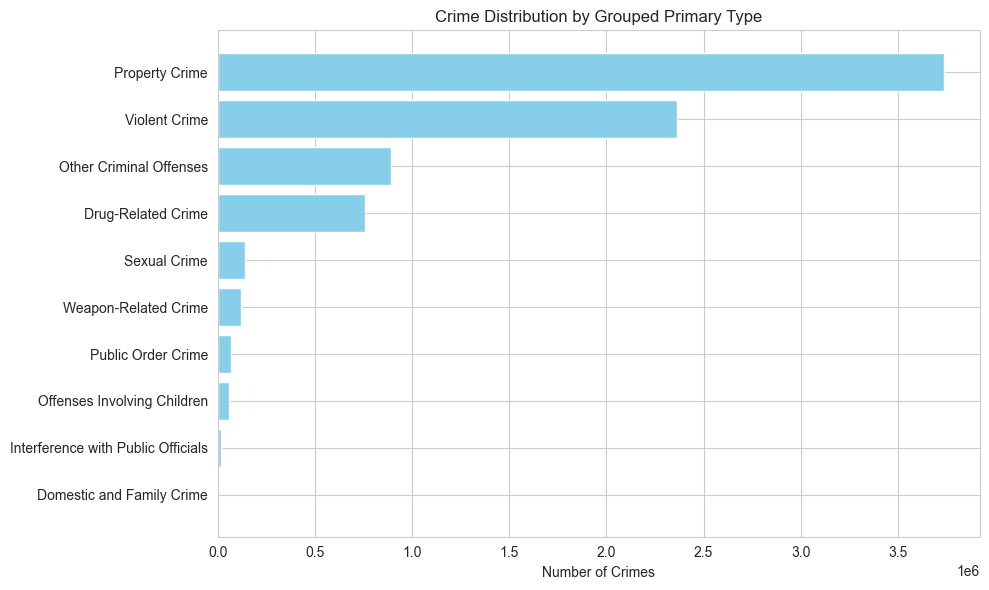

In [45]:
# Plotting the data
crime_categories = df['Primary Type Grouped'].value_counts().index
crime_counts = df['Primary Type Grouped'].value_counts().values

plt.figure(figsize=(10, 6))
plt.barh(crime_categories, crime_counts, color='skyblue')
plt.xlabel('Number of Crimes')
plt.title('Crime Distribution by Grouped Primary Type')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Month',
       'DayOfWeek', 'Hour', 'Cluster', 'Location Category',
       'Primary Type Grouped'],
      dtype='object')

In [47]:
df['Primary Type Grouped'].unique()

array(['Other Criminal Offenses', 'Property Crime', 'Violent Crime',
       'Weapon-Related Crime', 'Interference with Public Officials',
       'Sexual Crime', 'Drug-Related Crime', 'Public Order Crime',
       'Offenses Involving Children', 'Domestic and Family Crime'],
      dtype=object)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156508 entries, 0 to 8156507
Data columns (total 27 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

In [49]:
df['Location Category'].unique()

array(['Commercial', 'Residential', 'Other', 'Public Space',
       'Recreation and Entertainment', 'Government/Public Institution',
       'Transportation', 'Other Locations', 'Health Facility',
       'Educational/Institutional'], dtype=object)

5. Beat, Ward, Community Area

In [50]:
df['Latitude'].isnull().sum()

0

In [51]:
from sklearn.cluster import KMeans

# Example: Clustering Beats, Wards, and Community Areas
kmeans = KMeans(n_clusters=10, random_state=42)
df['Geo Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

# Frequency Encoding for 'Beat', 'Ward', and 'Community Area'
beat_freq = df['Beat'].value_counts()
df['Beat Frequency'] = df['Beat'].map(beat_freq)

ward_freq = df['Ward'].value_counts()
df['Ward Frequency'] = df['Ward'].map(ward_freq)

community_area_freq = df['Community Area'].value_counts()
df['Community Area Frequency'] = df['Community Area'].map(community_area_freq)



In [52]:
df['Geo Cluster'].unique()

array([3, 9, 4, 1, 6, 8, 7, 0, 2, 5], dtype=int32)

In [53]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Month',
       'DayOfWeek', 'Hour', 'Cluster', 'Location Category',
       'Primary Type Grouped', 'Geo Cluster', 'Beat Frequency',
       'Ward Frequency', 'Community Area Frequency'],
      dtype='object')

In [54]:
# Drop columns that may not be present using errors='ignore'
df = df.drop(['ID', 'Case Number', 'Date', 'Description', 'Location Description',  
              'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On'], axis=1, errors='ignore')

# Verify the columns
print(df.columns)


Index(['Block', 'IUCR', 'Primary Type', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'Year', 'Latitude', 'Longitude',
       'Month', 'DayOfWeek', 'Hour', 'Cluster', 'Location Category',
       'Primary Type Grouped', 'Geo Cluster', 'Beat Frequency',
       'Ward Frequency', 'Community Area Frequency'],
      dtype='object')


In [55]:
df.head()

,Block,IUCR,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,Year,...,Month,DayOfWeek,Hour,Cluster,Location Category,Primary Type Grouped,Geo Cluster,Beat Frequency,Ward Frequency,Community Area Frequency
0,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,False,False,111,1.0,42.0,32.0,2015,...,3,Wednesday,12,20,Commercial,Other Criminal Offenses,3,35312,333555,204268
1,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,False,False,2515,25.0,36.0,19.0,2018,...,12,Thursday,15,20,Residential,Other Criminal Offenses,3,33522,88112,149263
2,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,False,False,824,8.0,15.0,63.0,2016,...,5,Sunday,0,20,Residential,Other Criminal Offenses,3,36745,206503,74230
3,045XX N ALBANY AVE,2820,OTHER OFFENSE,False,False,1724,17.0,33.0,14.0,2018,...,12,Thursday,16,20,Residential,Other Criminal Offenses,3,22737,81892,73212
4,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,False,False,2222,22.0,21.0,71.0,2014,...,6,Sunday,0,20,Residential,Other Criminal Offenses,3,32036,245990,227827


# Importing Chicago police stations Data

In [56]:
import pandas as pd

# Load police station data
police_stations = pd.read_csv('/Users/saitejasriyerramsetti/Documents/BDA 696/chicago crime/data/chicago_police_stations.csv')

# Assume police station data has 'Station Name', 'Latitude', 'Longitude' columns
print(police_stations.head(5))


       DISTRICT DISTRICT NAME              ADDRESS     CITY STATE    ZIP  \
0  Headquarters  Headquarters  3510 S Michigan Ave  Chicago    IL  60653   
1            18    Near North   1160 N Larrabee St  Chicago    IL  60610   
2            19     Town Hall     850 W Addison St  Chicago    IL  60613   
3            20       Lincoln   5400 N Lincoln Ave  Chicago    IL  60625   
4            22   Morgan Park  1900 W Monterey Ave  Chicago    IL  60643   

                                             WEBSITE         PHONE  \
0                      http://home.chicagopolice.org           NaN   
1  http://home.chicagopolice.org/community/distri...  312-742-5870   
2  http://home.chicagopolice.org/community/distri...  312-744-8320   
3  http://home.chicagopolice.org/community/distri...  312-742-8714   
4  http://home.chicagopolice.org/community/distri...  312-745-0710   

            FAX           TTY  X COORDINATE  Y COORDINATE   LATITUDE  \
0           NaN           NaN   1177731.401   1881

Step 2: Calculate the Distance Using Geopy
- You can use Geopy to calculate the distance between each crime record (using its latitude and longitude) and each police station to determine the nearest police station.

**Recommended Approach for Your Scenario:**
- Given the size of your dataset (8 million rows), I would recommend using the BallTree approach with the haversine metric. It is computationally efficient and retains good accuracy for geographic distances.


**Approximate Nearest Neighbors Using BallTree or KDTree:**
For a dataset of this size, you can use spatial data structures like BallTree or KDTree from scikit-learn to find the nearest neighbors efficiently.

**Steps to Implement:**

1. Construct a BallTree or KDTree using the police station coordinates.
2. Query the nearest neighbor for each crime record.


In [57]:
from sklearn.neighbors import BallTree
import numpy as np

# Convert latitudes and longitudes to radians for BallTree (which works better with radian values)
crime_coords = np.radians(df[['Latitude', 'Longitude']])
police_coords = np.radians(police_stations[['LATITUDE', 'LONGITUDE']])

# Build the BallTree using police station coordinates
tree = BallTree(police_coords, metric='haversine')

# Query the nearest police station for each crime record
# The result is in radians, multiply by Earth's radius to get the distance in kilometers
distances, _ = tree.query(crime_coords, k=1)
df['Distance_to_Nearest_Police_Station'] = distances.flatten() * 6371  # Earth's radius in kilometers


In [58]:
df.head()

,Block,IUCR,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,Year,...,DayOfWeek,Hour,Cluster,Location Category,Primary Type Grouped,Geo Cluster,Beat Frequency,Ward Frequency,Community Area Frequency,Distance_to_Nearest_Police_Station
0,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,False,False,111,1.0,42.0,32.0,2015,...,Wednesday,12,20,Commercial,Other Criminal Offenses,3,35312,333555,204268,1.069789
1,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,False,False,2515,25.0,36.0,19.0,2018,...,Thursday,15,20,Residential,Other Criminal Offenses,3,33522,88112,149263,1.069789
2,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,False,False,824,8.0,15.0,63.0,2016,...,Sunday,0,20,Residential,Other Criminal Offenses,3,36745,206503,74230,1.069789
3,045XX N ALBANY AVE,2820,OTHER OFFENSE,False,False,1724,17.0,33.0,14.0,2018,...,Thursday,16,20,Residential,Other Criminal Offenses,3,22737,81892,73212,1.069789
4,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,False,False,2222,22.0,21.0,71.0,2014,...,Sunday,0,20,Residential,Other Criminal Offenses,3,32036,245990,227827,1.069789


In [59]:
columns = df.columns.tolist()
for i in columns:
    print(df[i].unique())


['0000X W WACKER DR' '023XX N LOCKWOOD AVE' '055XX S ROCKWELL ST' ...
 '012XX W Montana St' '037XX S Union Ave' '014XX N Sandburg TER']
['1153' '1154' '2820' '0810' '0820' '0460' '051A' '0430' '0890' '1195'
 '143A' '1130' '1120' '3730' '1563' '0486' '0420' '1140' '2825' '0860'
 '0620' '2024' '0560' '2027' '2250' '2014' '0281' '0454' '141A' '0910'
 '1310' '1320' '5000' '1150' '0498' '041A' '1220' '1206' '1156' '1210'
 '5002' '1811' '4387' '0610' '1155' '2826' '1110' '1152' '0496' '1751'
 '1122' '1752' '1780' '0520' '0265' '0440' '1121' '1754' '1477' '0930'
 '1330' '1345' '0340' '1822' '0320' '0497' '031A' '0530' '0870' '502P'
 '1710' '502R' '1365' '1261' '3710' '2028' '1544' '2850' '2017' '0330'
 '1581' '0312' '0554' '1513' '4389' '0326' '0266' '0325' '0484' '1200'
 '1753' '1562' '0583' '1582' '1350' '1242' '1750' '1305' '0545' '0880'
 '2093' '0110' '0261' '1340' '0630' '1245' '0580' '4230' '0584' '031B'
 '2851' '0313' '1020' '0920' '1360' '1478' '500E' '2091' '0479' '2890'
 '1585' '091

In [60]:
print(columns)

['Block', 'IUCR', 'Primary Type', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year', 'Latitude', 'Longitude', 'Month', 'DayOfWeek', 'Hour', 'Cluster', 'Location Category', 'Primary Type Grouped', 'Geo Cluster', 'Beat Frequency', 'Ward Frequency', 'Community Area Frequency', 'Distance_to_Nearest_Police_Station']


# Detecting the outliers in latitude and longitude

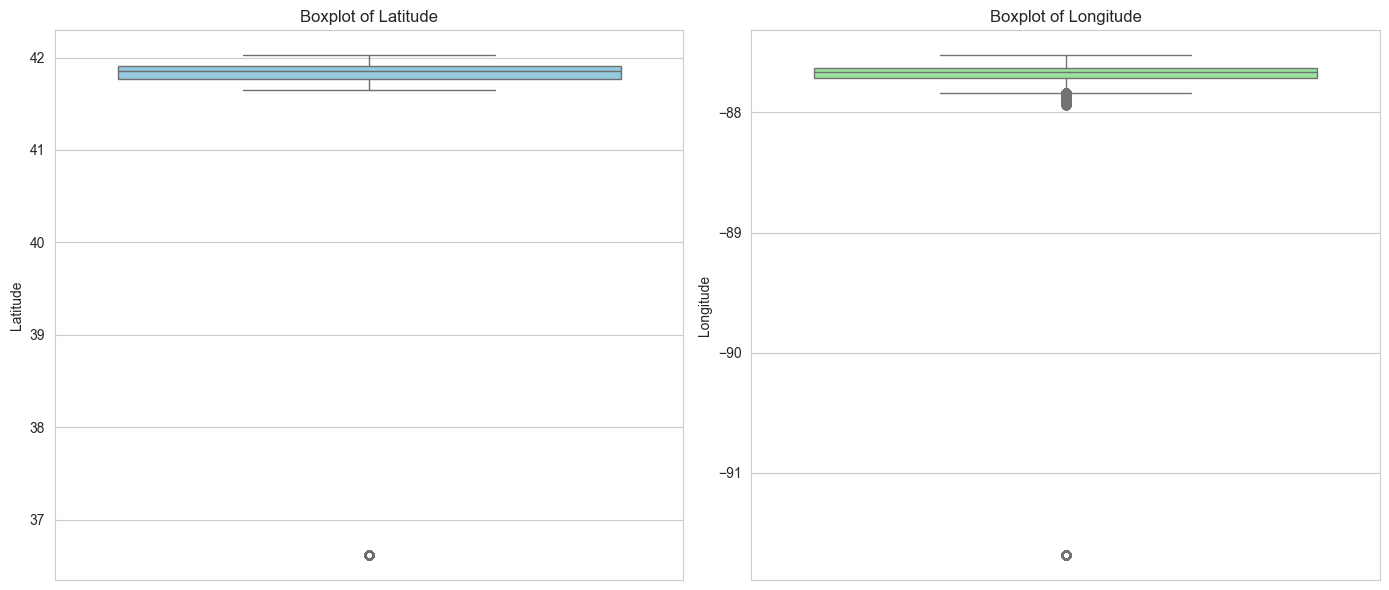

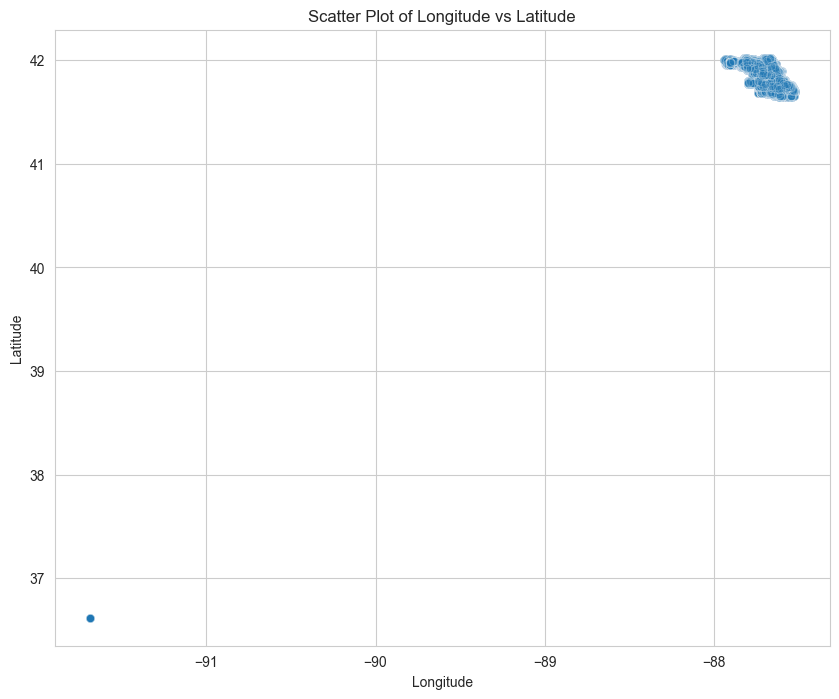

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you've already loaded it into 'df')
# df = pd.read_csv('your_dataset.csv') 

# Define the columns for analysis
latitude = df['Latitude']
longitude = df['Longitude']

# Create a boxplot to visualize outliers in Latitude and Longitude
plt.figure(figsize=(14, 6))

# Boxplot for Latitude
plt.subplot(1, 2, 1)
sns.boxplot(y=latitude, color='skyblue')
plt.title('Boxplot of Latitude')

# Boxplot for Longitude
plt.subplot(1, 2, 2)
sns.boxplot(y=longitude, color='lightgreen')
plt.title('Boxplot of Longitude')

plt.tight_layout()
plt.show()

# Scatter plot to visualize spatial distribution and potential outliers
plt.figure(figsize=(10, 8))
sns.scatterplot(x=longitude, y=latitude, alpha=0.3)
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [62]:
print(df['Longitude'].value_counts(), df['Longitude'].min(), df['Longitude'].max())


Longitude
-87.665990    89842
-87.905227    14537
-87.741529    10671
-87.627877     8958
-87.624097     4953
              ...  
-87.656231        1
-87.719854        1
-87.647230        1
-87.702067        1
-87.605186        1
Name: count, Length: 899908, dtype: int64 -91.686565684 -87.524529378


In [63]:
print(df['Latitude'].value_counts(), df['Latitude'].min(), df['Latitude'].max())    

Latitude
41.856088    89842
41.976290    14537
41.754593    10671
41.883500     8958
41.897895     4947
             ...  
41.926426        1
41.873100        1
41.761781        1
41.861676        1
41.725697        1
Name: count, Length: 900505, dtype: int64 36.619446395 42.022910333


In [64]:
import pandas as pd
import numpy as np

# Define valid latitude and longitude ranges for Chicago
LAT_MIN, LAT_MAX = 41.64, 42.05
LON_MIN, LON_MAX = -87.94, -87.52

# Filter out rows where latitude and longitude are not in the Chicago range
df = df[(df['Latitude'] >= LAT_MIN) & (df['Latitude'] <= LAT_MAX) &
              (df['Longitude'] >= LON_MIN) & (df['Longitude'] <= LON_MAX)]


# Reset the index to keep the DataFrame clean after filtering
df.reset_index(drop=True, inplace=True)

In [65]:
Q1 = df['Latitude'].quantile(0.25)
Q3 = df['Latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying Latitude outliers
latitude_outliers = df[(df['Latitude'] < lower_bound) | (df['Latitude'] > upper_bound)]

# Similarly, apply the IQR method to Longitude
Q1_long = df['Longitude'].quantile(0.25)
Q3_long = df['Longitude'].quantile(0.75)
IQR_long = Q3_long - Q1_long
lower_bound_long = Q1_long - 1.5 * IQR_long
upper_bound_long = Q3_long + 1.5 * IQR_long

longitude_outliers = df[(df['Longitude'] < lower_bound_long) | (df['Longitude'] > upper_bound_long)]
print(f"Latitude Outliers: {len(latitude_outliers)}")
print(f"Longitude Outliers: {len(longitude_outliers)}")


Latitude Outliers: 0
Longitude Outliers: 41411


In [66]:
# Remove rows with longitude outliers
valid_longitude = (df['Longitude'] >= -87.94) & (df['Longitude'] <= -87.52)
df = df[valid_longitude].reset_index(drop=True)

print(f"Number of rows after removing longitude outliers: {len(df)}")


Number of rows after removing longitude outliers: 8156359


In [67]:
print(df['Longitude'].value_counts(), df['Longitude'].min(), df['Longitude'].max())


Longitude
-87.665990    89842
-87.905227    14537
-87.741529    10671
-87.627877     8958
-87.624097     4953
              ...  
-87.656231        1
-87.719854        1
-87.647230        1
-87.702067        1
-87.605186        1
Name: count, Length: 899907, dtype: int64 -87.939732936 -87.524529378


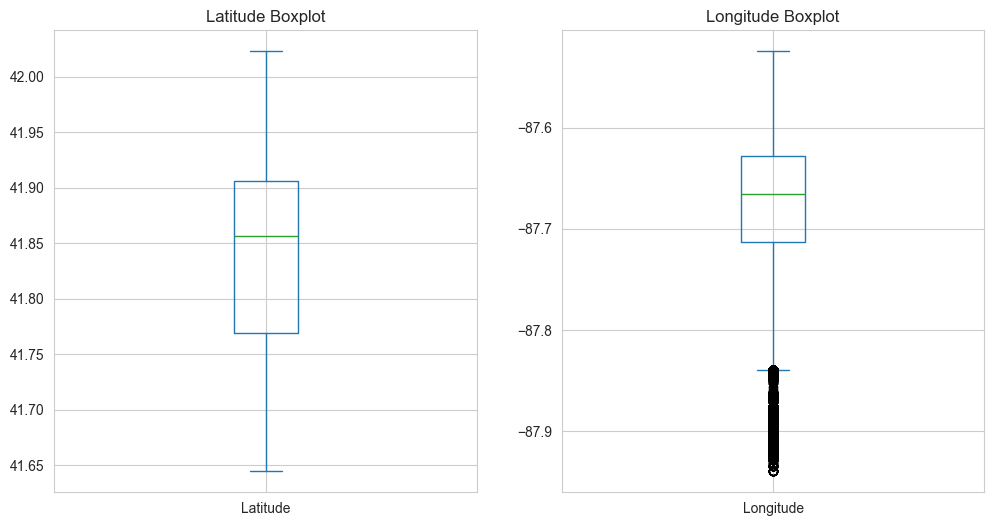

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Latitude'].plot(kind='box')
plt.title('Latitude Boxplot')

plt.subplot(1, 2, 2)
df['Longitude'].plot(kind='box')
plt.title('Longitude Boxplot')

plt.show()


In [69]:
df.shape

(8156359, 23)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156359 entries, 0 to 8156358
Data columns (total 23 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Block                               object 
 1   IUCR                                object 
 2   Primary Type                        object 
 3   Arrest                              bool   
 4   Domestic                            bool   
 5   Beat                                int64  
 6   District                            float64
 7   Ward                                float64
 8   Community Area                      float64
 9   Year                                int32  
 10  Latitude                            float64
 11  Longitude                           float64
 12  Month                               int32  
 13  DayOfWeek                           object 
 14  Hour                                int32  
 15  Cluster                             int32  
 16  

In [71]:
df.head()

,Block,IUCR,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,Year,...,DayOfWeek,Hour,Cluster,Location Category,Primary Type Grouped,Geo Cluster,Beat Frequency,Ward Frequency,Community Area Frequency,Distance_to_Nearest_Police_Station
0,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,False,False,111,1.0,42.0,32.0,2015,...,Wednesday,12,20,Commercial,Other Criminal Offenses,3,35312,333555,204268,1.069789
1,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,False,False,2515,25.0,36.0,19.0,2018,...,Thursday,15,20,Residential,Other Criminal Offenses,3,33522,88112,149263,1.069789
2,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,False,False,824,8.0,15.0,63.0,2016,...,Sunday,0,20,Residential,Other Criminal Offenses,3,36745,206503,74230,1.069789
3,045XX N ALBANY AVE,2820,OTHER OFFENSE,False,False,1724,17.0,33.0,14.0,2018,...,Thursday,16,20,Residential,Other Criminal Offenses,3,22737,81892,73212,1.069789
4,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,False,False,2222,22.0,21.0,71.0,2014,...,Sunday,0,20,Residential,Other Criminal Offenses,3,32036,245990,227827,1.069789


# Preprocessing the data

In [72]:
# One-Hot Encode categorical columns
categorical_columns = ['Primary Type', 'DayOfWeek', 'Location Category', 'Primary Type Grouped']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [73]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numeric_columns = ['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Latitude', 'Longitude', 'Month', 'Hour', 
                   'Cluster', 'Geo Cluster', 'Beat Frequency', 'Ward Frequency', 'Community Area Frequency', 
                   'Distance_to_Nearest_Police_Station']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [74]:
df.head()

,Block,IUCR,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,...,Location Category_Transportation,Primary Type Grouped_Drug-Related Crime,Primary Type Grouped_Interference with Public Officials,Primary Type Grouped_Offenses Involving Children,Primary Type Grouped_Other Criminal Offenses,Primary Type Grouped_Property Crime,Primary Type Grouped_Public Order Crime,Primary Type Grouped_Sexual Crime,Primary Type Grouped_Violent Crime,Primary Type Grouped_Weapon-Related Crime
0,0000X W WACKER DR,1153,False,False,-1.526084,-1.479568,1.385019,-0.247464,0.659332,0.15625,...,False,False,False,False,True,False,False,False,False,False
1,023XX N LOCKWOOD AVE,1154,False,False,1.890860,1.968783,0.952669,-0.851086,1.104766,0.15625,...,False,False,False,False,True,False,False,False,False,False
2,055XX S ROCKWELL ST,1153,False,False,-0.512656,-0.473799,-0.560554,1.191943,0.807810,0.15625,...,False,False,False,False,True,False,False,False,False,False
3,045XX N ALBANY AVE,2820,False,False,0.766566,0.819333,0.736494,-1.083249,1.104766,0.15625,...,False,False,False,False,True,False,False,False,False,False
4,087XX S SANGAMON ST,1153,False,False,1.474402,1.537739,-0.128205,1.563403,0.510854,0.15625,...,False,False,False,False,True,False,False,False,False,False


In [75]:
df['Arrest'] = df['Arrest'].astype(int)
df['Domestic'] = df['Domestic'].astype(int)


In [76]:
# Example normalization
df['Hour'] = df['Hour'] / 23.0

In [77]:
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 23.0)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 23.0)


In [78]:
df.columns

Index(['Block', 'IUCR', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward',
       'Community Area', 'Year', 'Latitude', 'Longitude', 'Month', 'Hour',
       'Cluster', 'Geo Cluster', 'Beat Frequency', 'Ward Frequency',
       'Community Area Frequency', 'Distance_to_Nearest_Police_Station',
       'Primary Type_ASSAULT', 'Primary Type_BATTERY', 'Primary Type_BURGLARY',
       'Primary Type_CONCEALED CARRY LICENSE VIOLATION',
       'Primary Type_CRIM SEXUAL ASSAULT', 'Primary Type_CRIMINAL DAMAGE',
       'Primary Type_CRIMINAL SEXUAL ASSAULT',
       'Primary Type_CRIMINAL TRESPASS', 'Primary Type_DECEPTIVE PRACTICE',
       'Primary Type_DOMESTIC VIOLENCE', 'Primary Type_GAMBLING',
       'Primary Type_HOMICIDE', 'Primary Type_HUMAN TRAFFICKING',
       'Primary Type_INTERFERENCE WITH PUBLIC OFFICER',
       'Primary Type_INTIMIDATION', 'Primary Type_KIDNAPPING',
       'Primary Type_LIQUOR LAW VIOLATION', 'Primary Type_MOTOR VEHICLE THEFT',
       'Primary Type_NARCOTICS', 'Primary T

In [79]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [80]:
train_df = train_df.sample(frac=1, random_state=42)


In [81]:
train_df

,Block,IUCR,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,...,Primary Type Grouped_Interference with Public Officials,Primary Type Grouped_Offenses Involving Children,Primary Type Grouped_Other Criminal Offenses,Primary Type Grouped_Property Crime,Primary Type Grouped_Public Order Crime,Primary Type Grouped_Sexual Crime,Primary Type Grouped_Violent Crime,Primary Type Grouped_Weapon-Related Crime,Hour_sin,Hour_cos
7959456,036XX N PINE GROVE AVE,0620,0,0,1.052259,1.106695,1.673252,-1.454709,1.401722,1.238159,...,False,False,False,True,False,False,False,False,0.010381,0.999946
6166925,032XX W FRANKLIN BLVD,2825,0,1,-0.090513,-0.042755,0.376203,-0.665356,0.362376,0.551302,...,False,False,True,False,False,False,False,False,-0.019501,0.999810
1557787,030XX S KILBOURN AVE,0935,0,0,-0.218435,-0.186437,-0.056147,-0.340329,-0.528492,-0.059643,...,False,False,False,True,False,False,False,False,-0.003682,0.999993
388583,042XX N ELSTON AVE,1310,0,0,0.765145,0.819333,1.168844,-0.990384,-0.825448,1.345510,...,False,False,False,True,False,False,False,False,-0.014228,0.999899
3423694,054XX N CUMBERLAND AVE,0810,0,0,0.610217,0.675651,1.312960,1.795566,-1.122404,1.580558,...,False,False,False,True,False,False,False,False,0.010381,0.999946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116082,013XX S CLINTON ST,1154,0,0,-1.507606,-1.479568,-0.848787,-0.433194,1.401722,0.253601,...,False,False,True,False,False,False,False,False,-0.001924,0.999998
302883,050XX S DAMEN AVE,0486,0,1,-0.360571,-0.330118,-0.560554,1.099078,1.995634,-0.465814,...,False,False,False,False,False,False,True,False,-0.000166,1.000000
694555,081XX S SCOTTSDALE AVE,1153,0,0,-0.498442,-0.473799,-0.344380,1.516971,1.698678,-1.144377,...,False,False,True,False,False,False,False,False,-0.005440,0.999985
7129386,026XX S PULASKI RD,0460,1,0,-0.218435,-0.186437,-0.056147,-0.340329,0.807810,0.011084,...,False,False,False,False,False,False,True,False,-0.008955,0.999960


In [82]:
import torch.utils.data as data

# Custom Dataset class (assuming features are all numeric now)
class CrimeDataset(data.Dataset):
    def __init__(self, df):
        self.X = df.drop(['Hour', 'Latitude', 'Longitude'], axis=1).values
        self.y_time = df['Hour'].values
        self.y_location = df[['Latitude', 'Longitude']].values

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'features': torch.tensor(self.X[index], dtype=torch.float32),
            'y_time': torch.tensor(self.y_time[index], dtype=torch.float32),
            'y_location': torch.tensor(self.y_location[index], dtype=torch.float32)
        }

# Create DataLoader
train_dataset = CrimeDataset(train_df)
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156359 entries, 0 to 8156358
Data columns (total 80 columns):
 #   Column                                                   Dtype  
---  ------                                                   -----  
 0   Block                                                    object 
 1   IUCR                                                     object 
 2   Arrest                                                   int64  
 3   Domestic                                                 int64  
 4   Beat                                                     float64
 5   District                                                 float64
 6   Ward                                                     float64
 7   Community Area                                           float64
 8   Year                                                     float64
 9   Latitude                                                 float64
 10  Longitude                                 

The LabelEncoder is a preprocessing tool used to convert categorical labels into a numerical form, which makes them usable by machine learning models. Specifically, it transforms each unique category in the column into a corresponding integer.

- For example, if you have a column like IUCR with values like 0630, 0810, 0860, etc., the LabelEncoder will assign a unique integer to each of these codes. This allows models to process the data since they require numerical inputs rather than strings or other non-numeric data types.

# Multi task Crime Model

### RNN for predicting temporal crime pattern

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Block'] = label_encoder.fit_transform(df['Block'])

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['IUCR'] = label_encoder.fit_transform(df['IUCR'])


## STEP 1: Data Preparetion

In [86]:
import pandas as pd
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer

# Assuming df is the DataFrame you already have
# Create a new time index for training
df["time_idx"] = df.index

train_df, val_df = train_test_split(df, test_size=0.2, shuffle=False)

# Define the maximum length of the input sequence and output prediction horizon
max_encoder_length = 24  # Look at the past 24 hours
max_prediction_length = 1  # Predict 1 time step ahead

# Define the columns that are actually present in the DataFrame
time_varying_known_reals = ["time_idx", "Month"]
day_columns = [col for col in df.columns if col.startswith("DayOfWeek_")]

# Add any day columns that actually exist
time_varying_known_reals.extend(day_columns)

# Create the TimeSeriesDataSet object
dataset = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="Hour",  # The target you are trying to predict
    group_ids=["Block"],  # Using "Block" as an identifier for different series
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_reals=["Beat", "District", "Community Area"],  # Static features that do not change with time
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=df.columns.difference(["Hour", "Block", "time_idx"]).tolist(),  # Features used for prediction
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,  # Allow missing timesteps to avoid assertion errors
)

print("Dataset successfully prepared.")


/Users/saitejasriyerramsetti/.pyenv/versions/3.11.7/lib/python3.11/site-packages/pytorch_forecasting/data/timeseries.py:1282: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 63403 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Block': 0}, {'__group_id__Block': 1}, {'__group_id__Block': 2}, {'__group_id__Block': 3}, {'__group_id__Block': 4}, {'__group_id__Block': 5}, {'__group_id__Block': 6}, {'__group_id__Block': 7}, {'__group_id__Block': 8}, {'__group_id__Block': 9}]
  warnings.warn(


Dataset successfully prepared.


## STEP 2:  DataLoader Creation

In [87]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader

# Split dataset into training and validation sets
train_size = 0.8
train_length = int(train_size * len(dataset))
val_length = len(dataset) - train_length

# Create separate TimeSeriesDataSet objects for training and validation
train_dataset = TimeSeriesDataSet(
    train_df,
    time_idx="time_idx",
    target="Hour",  # The target you are trying to predict
    group_ids=["Block"],  # Using "Block" as an identifier for different series
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_reals=["Beat", "District", "Community Area"],  # Static features that do not change with time
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=train_df.columns.difference(["Hour", "Block", "time_idx"]).tolist(),  # Features used for prediction
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True  # Add this line to handle missing timesteps
)

val_dataset = TimeSeriesDataSet(
    val_df,
    time_idx="time_idx",
    target="Hour",  # The target you are trying to predict
    group_ids=["Block"],  # Using "Block" as an identifier for different series
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_reals=["Beat", "District", "Community Area"],  # Static features that do not change with time
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=val_df.columns.difference(["Hour", "Block", "time_idx"]).tolist(),  # Features used for prediction
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True  # Add this line to handle missing timesteps
)

print("Training and Validation datasets successfully prepared.")

# Define batch size and number of workers
batch_size = 128
num_workers = 4  # Adjust based on your hardware capabilities

# Create DataLoaders for training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print("DataLoaders successfully created.")


/Users/saitejasriyerramsetti/.pyenv/versions/3.11.7/lib/python3.11/site-packages/pytorch_forecasting/data/timeseries.py:1282: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 61573 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Block': 0}, {'__group_id__Block': 1}, {'__group_id__Block': 2}, {'__group_id__Block': 3}, {'__group_id__Block': 4}, {'__group_id__Block': 5}, {'__group_id__Block': 6}, {'__group_id__Block': 7}, {'__group_id__Block': 8}, {'__group_id__Block': 9}]
  warnings.warn(
/Users/saitejasriyerramsetti/.pyenv/versions/3.11.7/lib/python3.11/site-packages/pytorch_forecasting/data/timeseries.py:1282: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 34772 series/groups which therefore are not present in the dataset index. This me

Training and Validation datasets successfully prepared.
DataLoaders successfully created.


## STEP 3: Model: Temporal Fusion Transformer with PyTorch Forecasting

Considering the size of your dataset, you want a model that balances training efficiency, scalability, and accuracy. Temporal Fusion Transformer (TFT) or TCNs would be strong candidates due to their ability to capture complex temporal dependencies and their scalability with large datasets. If you need even faster computation and can structure your features carefully, LightGBM or CatBoost could be highly efficient for a tabular dataset like yours.

In [89]:
# Features and target
features = train_df.columns.difference(['Hour'])
X_train = train_df[features]
y_train = train_df['Hour']
X_val = val_df[features]
y_val = val_df['Hour']

In [96]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Define feature set (X) and target set (y)
X = df.drop(columns=["Hour"])  # All features except 'Hour'
y = df["Hour"]  # Target column

# Assuming X and y are your features and target labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='gpu_hist' 
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    #early_stopping_rounds=10,
    verbose=True
)

# Predictions and evaluation
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Validation Mean Absolute Error: {mae}")


[0]	validation_0-rmse:0.04133
[1]	validation_0-rmse:0.03953
[2]	validation_0-rmse:0.03755
[3]	validation_0-rmse:0.03568
[4]	validation_0-rmse:0.03563
[5]	validation_0-rmse:0.03410
[6]	validation_0-rmse:0.03266
[7]	validation_0-rmse:0.03103
[8]	validation_0-rmse:0.02948
[9]	validation_0-rmse:0.02801
[10]	validation_0-rmse:0.02660
[11]	validation_0-rmse:0.02527
[12]	validation_0-rmse:0.02401
[13]	validation_0-rmse:0.02281
[14]	validation_0-rmse:0.02167
[15]	validation_0-rmse:0.02059
[16]	validation_0-rmse:0.01956
[17]	validation_0-rmse:0.01858
[18]	validation_0-rmse:0.01765
[19]	validation_0-rmse:0.01677
[20]	validation_0-rmse:0.01593
[21]	validation_0-rmse:0.01513
[22]	validation_0-rmse:0.01438
[23]	validation_0-rmse:0.01366
[24]	validation_0-rmse:0.01298
[25]	validation_0-rmse:0.01233
[26]	validation_0-rmse:0.01171
[27]	validation_0-rmse:0.01113
[28]	validation_0-rmse:0.01066
[29]	validation_0-rmse:0.01023
[30]	validation_0-rmse:0.00972
[31]	validation_0-rmse:0.00933
[32]	validation_0-

In [100]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
# Metrics Calculation
mae_val = mean_absolute_error(y_val, y_pred)
rmse_val = np.sqrt(np.mean((y_val - y_pred) ** 2))  # `squared=False` returns RMSE
r2_val = r2_score(y_val, y_pred)

print(f"Validation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_val}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")
print(f"R-squared (R²): {r2_val}")



Validation Metrics:
Mean Absolute Error (MAE): 2.1468483593020153e-05
Root Mean Squared Error (RMSE): 3.911870848321199e-05
R-squared (R²): 0.9999991913366766


###  STEP 4: cross validation

In [102]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# Perform cross-validation (5-fold)
cv_scores = cross_val_score(xgb_model, X, y, cv=3, scoring='neg_mean_absolute_error')

# Print cross-validation scores
mean_cv_mae = -cv_scores.mean()
print(f"Cross-Validation Mean Absolute Error: {mean_cv_mae:.5f}")

Cross-Validation Mean Absolute Error: 0.00006


In [104]:
# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Fit the model on the training set
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Predict on the test set
y_test_pred = xgb_model.predict(X_test)

# Evaluate using different metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Metrics:\nMAE: {mae_test:.5f}\nRMSE: {rmse_test:.5f}\nR^2: {r2_test:.5f}")


[0]	validation_0-rmse:0.04135
[1]	validation_0-rmse:0.03955
[2]	validation_0-rmse:0.03758
[3]	validation_0-rmse:0.03570
[4]	validation_0-rmse:0.03566
[5]	validation_0-rmse:0.03413
[6]	validation_0-rmse:0.03268
[7]	validation_0-rmse:0.03105
[8]	validation_0-rmse:0.02950
[9]	validation_0-rmse:0.02802
[10]	validation_0-rmse:0.02662
[11]	validation_0-rmse:0.02529
[12]	validation_0-rmse:0.02403
[13]	validation_0-rmse:0.02283
[14]	validation_0-rmse:0.02168
[15]	validation_0-rmse:0.02060
[16]	validation_0-rmse:0.01957
[17]	validation_0-rmse:0.01859
[18]	validation_0-rmse:0.01766
[19]	validation_0-rmse:0.01678
[20]	validation_0-rmse:0.01594
[21]	validation_0-rmse:0.01514
[22]	validation_0-rmse:0.01439
[23]	validation_0-rmse:0.01367
[24]	validation_0-rmse:0.01298
[25]	validation_0-rmse:0.01234
[26]	validation_0-rmse:0.01172
[27]	validation_0-rmse:0.01113
[28]	validation_0-rmse:0.01067
[29]	validation_0-rmse:0.01023
[30]	validation_0-rmse:0.00972
[31]	validation_0-rmse:0.00933
[32]	validation_0-

**Residual Analysis:**
- Plotting the residuals to confirm their randomness is important for evaluating model bias.

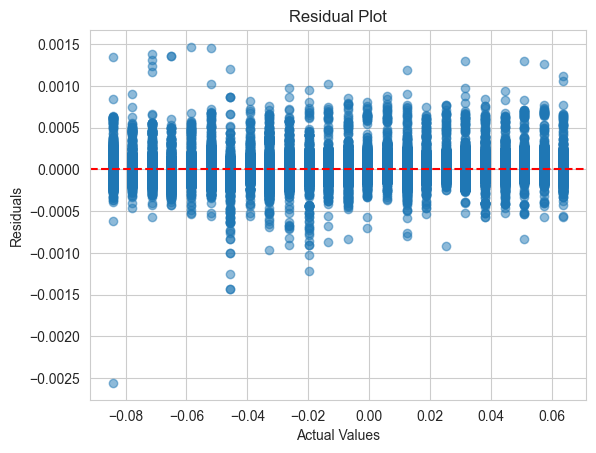

In [105]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


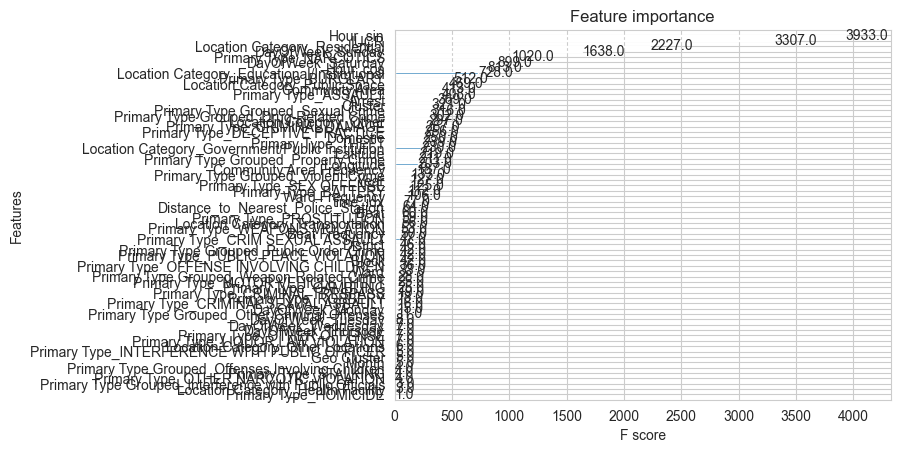

In [106]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()
